In [1]:
from collections import Counter
import itertools
import string
from rich import print as rprint

import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image

import pickle
from math import gcd
from itertools import product
from tqdm import tqdm

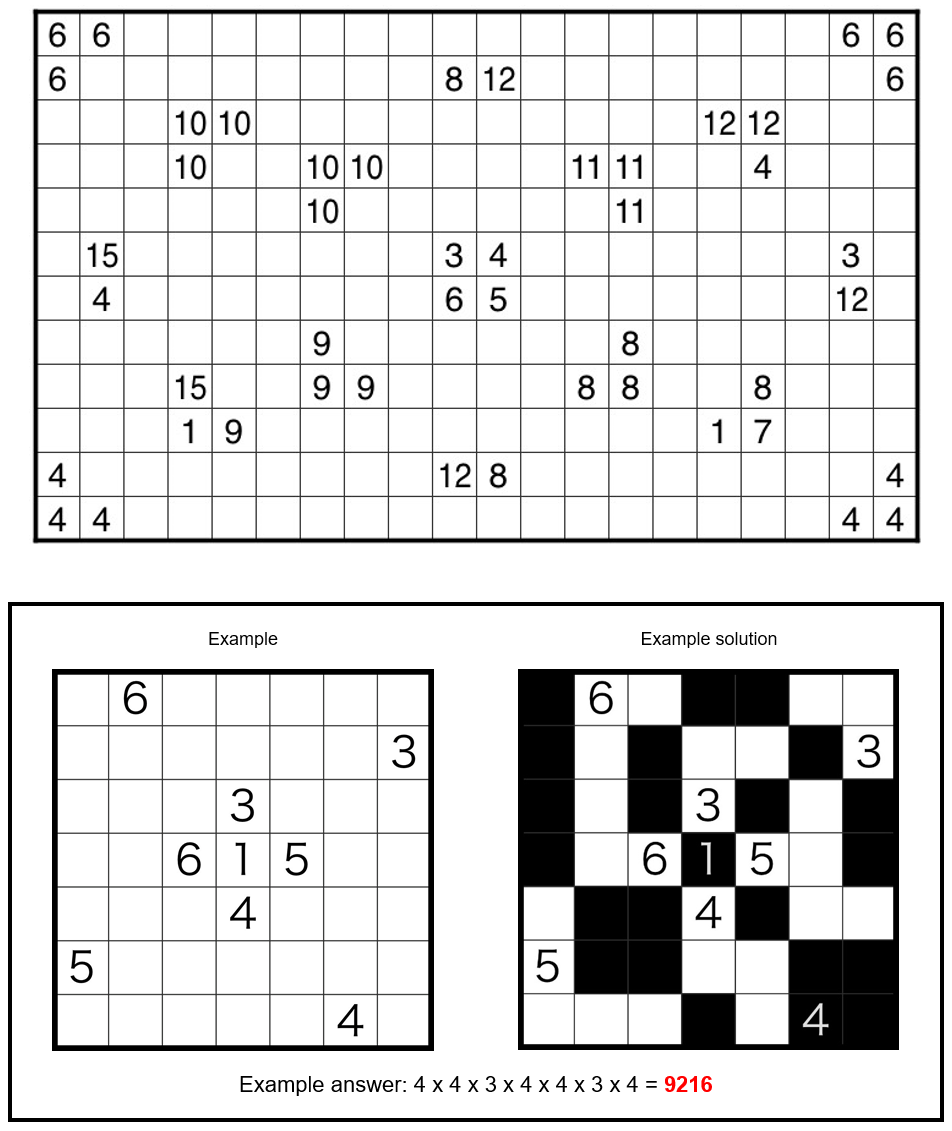

### Choco Banana

If we shade a subset of the cells in the above grid, we partition the
cells into orthogonally connected
regions
of shaded and unshaded
cells. The goal of this puzzle is to shade the cells so that
all regions of shaded cells are rectangular,
all regions of unshaded cells are
not
rectangular, and

In [3]:
url='https://www.janestreet.com/puzzles/current-puzzle/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y = [text for text in soup.body.stripped_strings]
display(Image('https://www.janestreet.com/puzzles/choco-banana.png',width=600))
display(Markdown("### "+y[8]+"\n\n"+str("\n".join(y[9:16]))))

### Absolute Rules
- a 1 is always shaded black
- a region may only go through at most one unique number
- black regions must be square
    - odd numbers can only be black if forming a straight line
- white regions must not be square
- if there are two numbers orthogonal to eachother, then they must have different shades
- if a region is formed, then immediately all orthogonal grids must be set to the opposite shade

In [12]:
def knapSack(W, wt, val, n):
    K = [[0 for w in range(W + 1)]
            for i in range(n + 1)]
             
    # Build table K[][] in bottom up manner
    for i in range(n + 1):
        for w in range(W + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif wt[i - 1] <= w:
                K[i][w] = max(val[i - 1] 
                  + K[i - 1][w - wt[i - 1]],
                               K[i - 1][w])
            else:
                K[i][w] = K[i - 1][w]
 
    return K[n][W]
 

# Driver code
val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)
 
print(knapSack(W, wt, val, n))

220


In [13]:
matrix = [
    [0,6,0,0,0,0,0],
    [0,0,0,0,0,0,3],
    [0,0,0,3,0,0,0],
    [0,0,6,1,5,0,0],
    [0,0,0,4,0,0,0],
    [5,0,0,0,0,0,0],
    [0,0,0,0,0,4,0]
]

In [17]:
import numpy as np

def is_rectangular(region):
    rows, cols = zip(*region)
    return min(rows) <= max(rows) and min(cols) <= max(cols)

def region_size(grid, row, col):
    visited = np.full(grid.shape, False, dtype=bool)
    stack = [(row, col)]
    size = 0

    while stack:
        r, c = stack.pop()
        if (0 <= r < grid.shape[0] and 0 <= c < grid.shape[1] and
                not visited[r][c] and grid[r][c] != -1):
            visited[r][c] = True
            size += 1
            stack.extend([(r-1, c), (r+1, c), (r, c-1), (r, c+1)])  # up, down, left, right

    return size

def find_regions(grid, value):
    visited = np.full(grid.shape, False, dtype=bool)
    regions = []
    for r in range(grid.shape[0]):
        for c in range(grid.shape[1]):
            if grid[r][c] == value and not visited[r][c]:
                stack = [(r, c)]
                region = []
                while stack:
                    curr_r, curr_c = stack.pop()
                    if (0 <= curr_r < grid.shape[0] and 0 <= curr_c < grid.shape[1] and
                            not visited[curr_r][curr_c] and grid[curr_r][curr_c] == value):
                        visited[curr_r][curr_c] = True
                        region.append((curr_r, curr_c))
                        stack.extend([(curr_r-1, curr_c), (curr_r+1, curr_c), (curr_r, curr_c-1), (curr_r, curr_c+1)])  # up, down, left, right
                regions.append(region)
    return regions

def is_valid(grid, matrix):
    for r in range(grid.shape[0]):
        for c in range(grid.shape[1]):
            if matrix[r][c] != 0 and matrix[r][c] != region_size(grid, r, c):
                return False

    shaded_regions = find_regions(grid, 1)
    unshaded_regions = find_regions(grid, 0)

    if any(is_rectangular(region) for region in unshaded_regions):
        return False

    if not all(is_rectangular(region) for region in shaded_regions):
        return False

    return True

def solve(grid, matrix, row, col):
    if row == grid.shape[0]:
        return grid if is_valid(grid, matrix) else None

    next_row, next_col = (row, col + 1) if col != grid.shape[1] - 1 else (row + 1, 0)

    for cell_state in [0, 1]:  # 0 for unshaded, 1 for shaded
        grid[row][col] = cell_state
        if is_valid(grid, matrix):
            result = solve(grid, next_row, next_col)
            if result is not None:  # A valid grid was found
                return result
        grid[row][col] = -1  # Reset cell

    return None  # No valid grid found from this point


In [18]:
matrix = np.array([
    [0,6,0,0,0,0,0],
    [0,0,0,0,0,0,3],
    [0,0,0,3,0,0,0],
    [0,0,6,1,5,0,0],
    [0,0,0,4,0,0,0],
    [5,0,0,0,0,0,0],
    [0,0,0,0,0,4,0]
])

# Create an empty grid with -1 indicating unfilled cells
grid = np.full(matrix.shape, -1, dtype=int)

solution = solve(grid, matrix, 0, 0)

if solution is not None:
    print("Solution found:")
    print(solution)
else:
    print("No solution found.")


No solution found.


In [13]:
import numpy as np

def is_valid(shade_map, matrix):
    # Check validity of each cell
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] > 1:
                if matrix[i][j] % 2 == 0: # Even number must be in a square
                    if not is_rectangle(i, j, matrix, shade_map):
                        return False
                else: # Odd number should be in a straight line
                    if not is_rectangle(i, j, matrix, shade_map):
                        return False
            elif matrix[i][j] == 1: # Cells with 1 should always be shaded
                if shade_map[i][j] != 1:
                    return False

    # Check validity of each shaded/unshaded region
    for i in range(len(shade_map)):
        for j in range(len(shade_map[0])):
            if shade_map[i][j] == 1: # Shaded region must be square
                if not is_rectangle(i, j, matrix, shade_map):
                    return False
            elif shade_map[i][j] == 0: # Unshaded region should not be square
                if is_rectangle(i, j, matrix, shade_map):
                    return False
    return True

def backtrack(matrix, shade_map, pos):
    # If all cells have been filled, return the shade map
    if pos >= len(matrix) * len(matrix[0]):
        if is_valid(shade_map, matrix):
            return shade_map
        else:
            return None

    i = pos // len(matrix[0])
    j = pos % len(matrix[0])

    # Try shading the cell
    shade_map[i][j] = 1
    result = backtrack(matrix, shade_map, pos + 1)
    if result is not None:
        return result

    # If shading the cell didn't lead to a valid solution, try not shading it
    shade_map[i][j] = 0
    result = backtrack(matrix, shade_map, pos + 1)
    if result is not None:
        return result

    # If neither shading nor not shading the cell led to a valid solution, return None
    shade_map[i][j] = -1
    return None

def is_rectangle(i, j, matrix, shade_map):
    n = matrix[i][j]

    # Special case for 0
    if n == 0:
        return True

    factors = get_factors(n)
    for a, b in factors:
        if i + a <= len(matrix) and j + b <= len(matrix[0]):
            if np.all(shade_map[x][j:j+b] == 1 for x in range(i, i + a)):
                return True
        if i + b <= len(matrix) and j + a <= len(matrix[0]):
            if np.all(shade_map[x][j:j+a] == 1 for x in range(i, i + b)):
                return True
    return False


def is_valid(shade_map, matrix):
    # Check validity of each cell
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] > 0:
                if not is_rectangle(i, j, matrix, shade_map):
                    return False

    # Check validity of each shaded/unshaded region
    for i in range(len(shade_map)):
        for j in range(len(shade_map[0])):
            if shade_map[i][j] == 1:  # Shaded region must be rectangular
                if not is_rectangle(i, j, matrix, shade_map):
                    return False
            elif shade_map[i][j] == 0:  # Unshaded region should not be rectangular
                if is_rectangle(i, j, matrix, shade_map):
                    return False
    return True

def get_factors(n):
    # A helper function to return all pairs of factors (a, b) where a*b = n
    factors = []
    for i in range(1, int(n**0.5) + 1):
        if n % i == 0:
            factors.append((i, n // i))
    return factors



def solve(matrix):
    shade_map = np.full(matrix.shape, -1)
    result = backtrack(matrix, shade_map, 0)
    if result is not None:
        print(result)
    else:
        print("No solution found")


In [14]:
matrix = np.array([
    [6,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  6],
    [6,  0,  0,  0,  0,  0,  0,  0,  0,  8, 12,  0,  0,  0,  0,  0,  0,  0,  0,  6],
    [0,  0,  0, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12, 12,  0,  0,  0],
    [0,  0,  0, 10,  0,  0, 10, 10,  0,  0,  0,  0, 11, 11,  0,  0,  4,  0,  0,  0],
    [0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0],
    [0, 15,  0,  0,  0,  0,  0,  0,  0,  3,  4,  0,  0,  0,  0,  0,  0,  0,  3,  0],
    [0,  4,  0,  0,  0,  0,  0,  0,  0,  6,  5,  0,  0,  0,  0,  0,  0,  0, 12,  0],
    [0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0],
    [0,  0,  0, 15,  0,  0,  9,  9,  0,  0,  0,  0,  8,  8,  0,  0,  8,  0,  0,  0],
    [0,  0,  0,  1,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  7,  0,  0,  0],
    [4,  0,  0,  0,  0,  0,  0,  0,  0, 12,  8,  0,  0,  0,  0,  0,  0,  0,  0,  4],
    [4,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  4],
])

matrix = np.array([
    [0,6,0,0,0,0,0],
    [0,0,0,0,0,0,3],
    [0,0,0,3,0,0,0],
    [0,0,6,1,5,0,0],
    [0,0,0,4,0,0,0],
    [5,0,0,0,0,0,0],
    [0,0,0,0,0,4,0]
])


matrix = np.array([
    [6,0,0],
    [0,6,0]
])

solve(matrix)

No solution found
